<a href="https://colab.research.google.com/github/venu72561-chinnam/AI-ML-project/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install tensorflow -q

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import tensorflow as tf

In [9]:
from tensorflow.keras.datasets import cifar10

In [10]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential

In [11]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [12]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [13]:
X_train = X_train.astype("float32") / 255.0

In [14]:
X_test = X_test.astype("float32") / 255.0

In [15]:
print("Training data shape:", X_train.shape)

Training data shape: (50000, 32, 32, 3)


In [16]:
print("Testing data shape:", X_test.shape)

Testing data shape: (10000, 32, 32, 3)


In [17]:
classes = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]

/tmp/ipython-input-3073989667.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[i])])


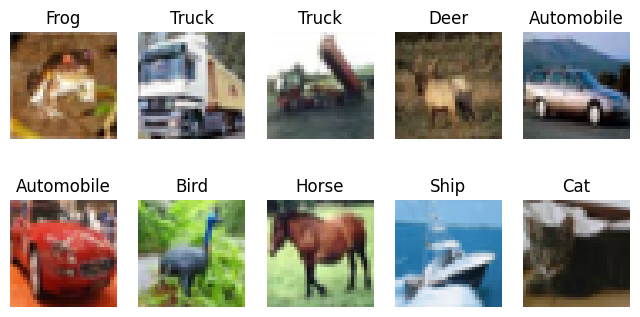

In [18]:
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(classes[int(y_train[i])])
    plt.axis("off")
plt.show()

In [19]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [21]:


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=5, batch_size=128)

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 89s 244ms/step - accuracy: 0.3265 - loss: 1.8388 - val_accuracy: 0.5250 - val_loss: 1.3141
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 87s 248ms/step - accuracy: 0.5714 - loss: 1.2048 - val_accuracy: 0.6188 - val_loss: 1.0607
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 145s 257ms/step - accuracy: 0.6497 - loss: 1.0033 - val_accuracy: 0.6486 - val_loss: 1.0089
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 138s 246ms/step - accuracy: 0.6943 - loss: 0.8708 - val_accuracy: 0.6756 - val_loss: 0.9502
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 145s 253ms/step - accuracy: 0.7274 - loss: 0.7834 - val_accuracy: 0.7126 - val_loss: 0.8254


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7072 - loss: 0.8437
Test Accuracy: 0.7039
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


/tmp/ipython-input-596481082.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"True: {classes[int(y_test[i])]}, Pred: {classes[np.argmax(predictions[i])]}")


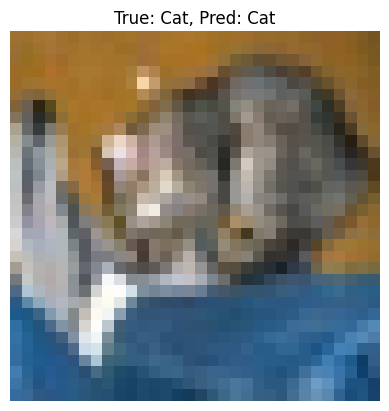

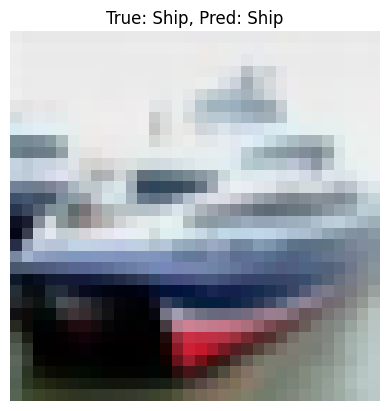

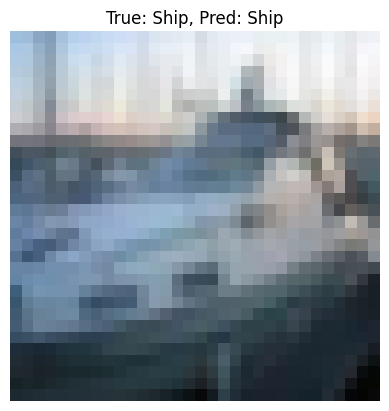

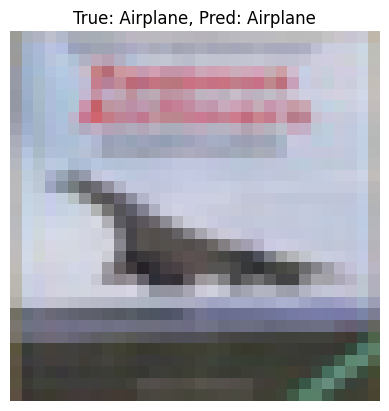

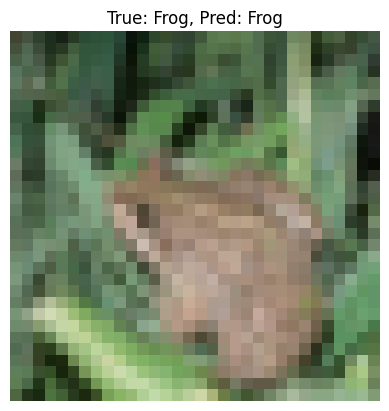

In [24]:
# 5. Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
predictions = model.predict(X_test[:5])
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"True: {classes[int(y_test[i])]}, Pred: {classes[np.argmax(predictions[i])]}")
    plt.axis("off")
    plt.show()